<a href="https://colab.research.google.com/github/tnatani/Bike-sharing-demand-predication/blob/main/Tushar_Natani_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Loading dataset and having first view**

In [9]:
# MOUNTING THE GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# LOADING THE DATA
# SETTING ENCODING AS UNICODE_ESCAPE BECAUSE IT GIVES UTF-8 ENCODING ERROR

df = pd.read_csv(r'//content/SeoulBikeData.csv', encoding = 'unicode_escape')


In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Exploratory Data Analysis and Data Preprocessing**

In [14]:
# CHECKING THE SHAPE OF OUR DATASET

df.shape

(8760, 14)

**Observations:**

1.The data contains 8760 rows and 14 columns.
2.The dataset the data of one year on daily basis from 1/12/2017 to 30/11/2018 i.e., 365 days each hour.
1 day = 24 hours and 1 year = 365 days. So, 1 year = 8,760 rows of data.

In [15]:
# CHECKING FOR NULL VALUES AS WELL AS DATATYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Observations:**

1.There are no null values.

2.There are 10 numerical columns and 4 categorical columns.

3.'Date' column is of 'object' data type.

In [16]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

With this, we can say that there are no null values present in our dataset.

In [17]:
# CONVERTING THE DATA TYPE OF 'DATE' COLUMN FROM 'OBJECT' TO 'DATE'

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'][:6]

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
5   2017-12-01
Name: Date, dtype: datetime64[ns]

In [18]:
# CHECKING FOR THE STATISTICAL VALUES

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Observations:**

There might be outliers in 'Visibility (10m)' and 'Solar Radiation (MJ/m2)' as the difference between their mean and median is large.

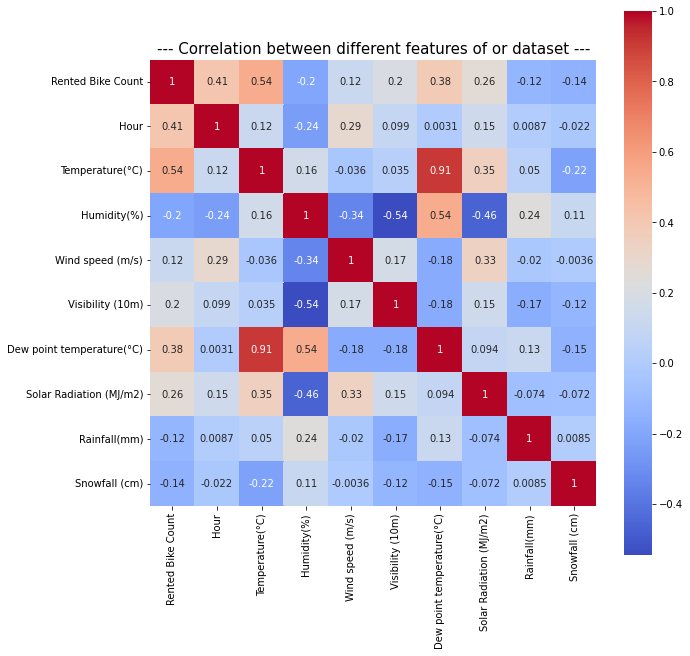

In [19]:
# CHECKING FOR CORRELATION

plt.figure(figsize = (10, 10))
plt.title('--- Correlation between different features of or dataset ---', size = 15)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, square = True)

Observation:

1. We can see that with our targer variable (Rented Bike Count), the most correlated variables are:

1.Hour

2.Temperature

3.Dew point temperature

4.solar radiation

2.Dew point tempearture is highly correlated with our target variable. This can cause multicolinearity problem in future. So, we can drop it.

In [20]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [21]:
# DROPPING THE COLUMN 'DEW POINT TEMPERATURE'

del df['Dew point temperature(°C)']

In [22]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [23]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


**Data Preparation and data Visualisation**

In [24]:
#Creating variables
#Variable which informs us if it is night or day
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [25]:
#We create a column feature which gives the day of the week and the month corresponding to the date
df['WeekDay']=df["Date"].dt.day_name()

In [26]:
df['Month']=df['Date'].dt.month

**Plotting variables to the target**

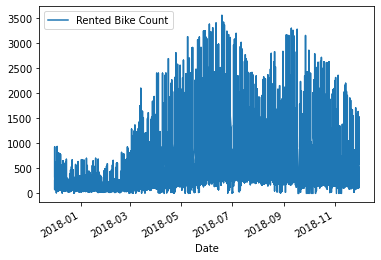

In [27]:
#On this first plot, we see a high raise between april to autumn of bikes rent

df.plot(x='Date',y='Rented Bike Count',kind='line')

So let's focus on the seasons where we have the most rents

Observations
1. We can see that as we expected, summer is the season in which we have the most rents.

In [28]:
#Let's try to understand why summer is the season with the most rents
df1VizSeasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


In [29]:
#Let's verify that it is linked to the solar Radiation
#This plot explains the high correlation with the feature 'solar Radiation' and 'Summer

df1VizSolarRadiation=pd.DataFrame(df.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


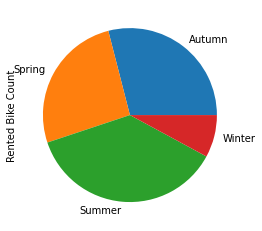

In [30]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()


Observation

1.Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

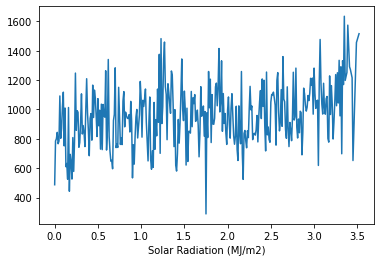

In [31]:
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

Observation

1.Here we have a repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by bike

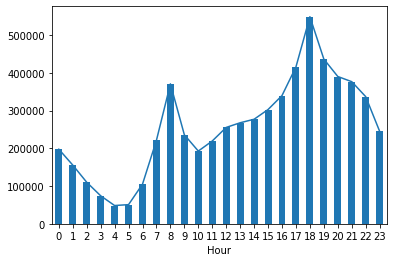

In [32]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

**Observation**

Days with highest rented bike are week days.
So we suppose people rent bikes to go to work or school

In [33]:
df1VizDays=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


Observation

1.Korean people like to ride bikes when it is pretty hot around 25°C in average

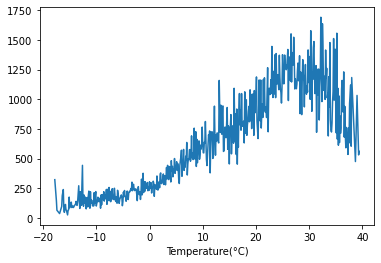

In [34]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

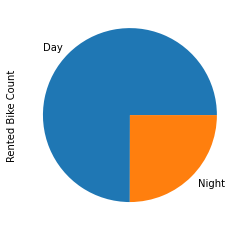

In [35]:

#Let's see the repartition of the rents follonwing the moment of the day
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

Observation

1. According to this boxplot there are much more rents during the day than the night.
2. As the median for the day is around 600 and the median for the night is around 350

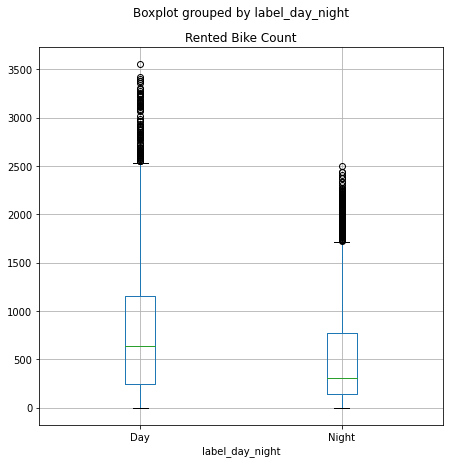

In [36]:
boxplotDay_night= df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

Observation

It means that koreans rent bikes to go to school or work

**Let's do a visualisation during the holidays**

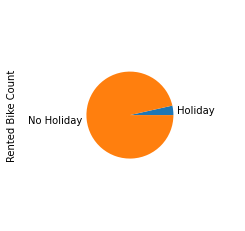

In [37]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.5)

**Observation**

We see that holiday rent are very low so let's see on which period extends holidays

The shape of this Df is 432 lines and 16 columns, it means that there are only 18 days of holidays in Korea which is very short. And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important

In [38]:
dfHoliday=df.loc[df['Holiday'] == 'Holiday']

In [39]:
dfHoliday.shape

(432, 16)

Let's plot the rent of bikes following the state of the weather

We can see that even if it rains a lot of korean rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes

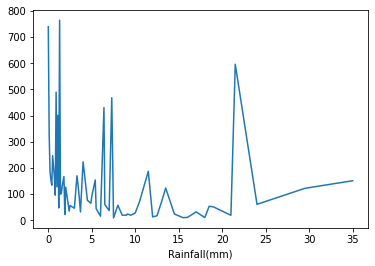

In [40]:
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

Observation

This raise between 20 and 25 mm of rainfall seems very contradictory, so we decide to explain this
We can see that these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important

In [41]:
df.loc[(df['Rainfall(mm)']>20)&(df['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Day,Monday,7
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Day,Wednesday,8


We can see on the y-axis, the amount of rents is very low
When we have more than 4 cm of snow, the bike rents is much lower

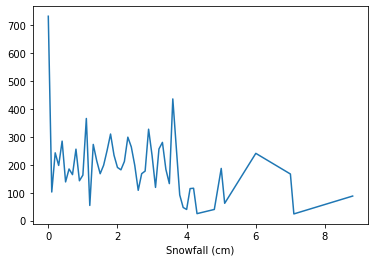

In [42]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

**We create the variable to encode WeekDay**

In [43]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

**Modelling**

We have to keep in mind that the most correlated features to the target are :

1.the hour

2.the temperature

3.the solar radiation

We have to drop some features that are not important to our target

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

**Let's create an object to report results**

In [45]:
reporting={}

In [46]:
X_MultipleLinearRegression=df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1] #the target

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_MultipleLinearRegression,y,test_size=0.27)

**Simple Linear Regression**

We tried to drop some of the features of the X_train_MultipleRegression to see if the score rised but it was not the case. So we kept the feature selection with the best score Furthermore, we don't scale data in Linear Regression, but if we did we would first have to split into train and test set

In [48]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [49]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: 459.9445509789434 and the coefficients are: [ 2.74704689e+01  3.10097078e+01 -7.56870746e+00  4.98598247e+00
  3.42381577e-03 -7.61411506e+01 -7.39730451e+01  2.12660799e+01
  7.76852831e+00 -1.18807610e+01]


In [50]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.4690610252748557 and the train root mean square is: 465.8511691323172
Linear model, R2 test score is : 0.47864736835264743 and the test root mean square is: 476.13332840794243


In [92]:
reporting['Linear regression']=test_set_r2
reporting

{'Decision Tree Regressor': 0.7468,
 'Lasso regression': 0.4780039301015765,
 'Linear regression': 0.47864736835264743,
 'Ridge regression': 0.47797085429850406}

This is a test to predict the rented bikes following features selected :
The order of the features in this test are :

[Hour (0 to 24) , Temperature (°C) , Humidity(%) , Wind speed (m/s) , Visibility(m) , Solar radiation (MJ/m2) , Rainfall(mm) , Snowfall(cm) , month(1 to 12) , WeekDay(1 to 7 : monday to Sunday)]

In [52]:
#fitregr.predict([[10,10,60,3,1000,0,0,2,12,1]])

**Ridge Regression**

In [53]:
X_RidgeRegression=df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1] #the target
X_train,X_test,y_train,y_test=train_test_split(X_RidgeRegression,y,test_size=0.27)

Let's test the values of the Ridge in function of the alpha value The R2 test highest value is 0.47, which is the same result as we had in the Linear Regression

In [54]:
errors=[]
coefs=[]
alphas=[-2000,-1000, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    coefs.append(linridge.coef_)
    errors.append(np.mean((linridge.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = -2000.00
 R2 training: 0.33, R2 test: 0.35

Alpha = -1000.00
 R2 training: 0.42, R2 test: 0.43

Alpha = 0.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 10.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 20.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 50.00
 R2 training: 0.47, R2 test: 0.48

Alpha = 6000.00
 R2 training: 0.46, R2 test: 0.47

Alpha = 1000000.00
 R2 training: 0.32, R2 test: 0.32



Grid Search on Ridge, we find the same result as the previous test

In [55]:
ridge=Ridge()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [56]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(X_test,y_test)

In [57]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestridge_testScore,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.47
 with Alpha = 203.00
 
The best R2 test score is : 0.48
 with Alpha = 203.00
 


In [91]:
reporting['Ridge regression']=bestridge_testScore
reporting

{'Decision Tree Regressor': 0.7468,
 'Lasso regression': 0.4780039301015765,
 'Linear regression': 0.47864736835264743,
 'Ridge regression': 0.47797085429850406}

In [ ]:
#gridSearchRidge.predict([[10,10,60,3,1000,0,0,2,12,1]])[0]

Observation

We see that when alpha is very large, it tends to 0

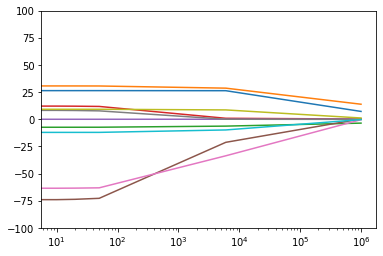

In [58]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-100,100)
plt.show()

**Lasso**

In [59]:
errors=[]
coefs=[]
alphas=[-60, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linLasso = Lasso(alpha = alpha).fit(X_train, y_train)
    r2_train = linLasso.score(X_train, y_train)
    r2_test = linLasso.score(X_test, y_test)
    coefs.append(linLasso.coef_)
    errors.append(np.mean((linLasso.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
Lasso R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = -60.00
 Lasso R2 training: 0.37, R2 test: 0.37

Alpha = 0.00
 Lasso R2 training: 0.47, R2 test: 0.48

Alpha = 10.00
 Lasso R2 training: 0.47, R2 test: 0.48

Alpha = 20.00
 Lasso R2 training: 0.47, R2 test: 0.47

Alpha = 50.00
 Lasso R2 training: 0.46, R2 test: 0.46

Alpha = 6000.00
 Lasso R2 training: 0.04, R2 test: 0.04

Alpha = 1000000.00
 Lasso R2 training: 0.00, R2 test: -0.00




Grid Search on Lasso, we find the same result as the previous test

In [60]:
lasso=Lasso()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train,y_train)



best_Lasso=gridSearchLasso.best_estimator_
bestLasso_testScore=best_Lasso.score(X_test,y_test)

In [61]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestLasso_testScore,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.47 with Alpha = 2.00
 
The best R2 test score is : 0.48
 with Alpha = 2.00
 


In [93]:
reporting['Lasso regression']=(bestLasso_testScore,4)
reporting

{'Decision Tree Regressor': 0.7468,
 'Lasso regression': (0.4780039301015765, 4),
 'Linear regression': 0.47864736835264743,
 'Ridge regression': 0.47797085429850406}

**Observation**

We see all the coef when the alphas raise, our coeficients converge to 0

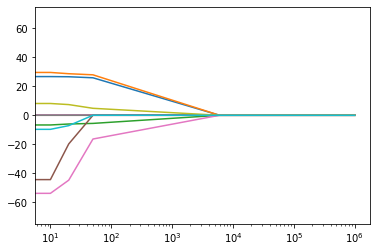

In [63]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-75,75)
plt.show()

**Decision Tree Regressor**

In [85]:
# ASSIGNING DECISION TREE REGRESSOR
decisionTree = DecisionTreeRegressor()

# SETTING PARAMETERS
param = {'max_depth': [1,4,5,6,7,10,15,20,8]}

# USING GRID SEARCH
gridSearch_decisionTree = GridSearchCV(decisionTree, param, scoring = 'r2', cv = 6)
gridSearch_decisionTree.fit(X_train, y_train)

# GETTING BEST ESTIMATOR
best_DecisionTree = gridSearch_decisionTree.best_estimator_

# GETTING BEST SCORE
bestDecisionTree_testScore = best_DecisionTree.score(X_test, y_test)

# PRINTING THE BEST R2 AND ALPHA VALUE
print(f"The best R^2 score for training data is {round(gridSearch_decisionTree.best_score_, 4)}\nwith Alpha {round(gridSearch_decisionTree.best_params_['max_depth'], 4)}")
print(f"\nThe best R^2 score for test data is {round(bestDecisionTree_testScore, 4)}\nwith Alpha {round(gridSearch_decisionTree.best_params_['max_depth'], 4)}")

The best R^2 score for training data is 0.7207
with Alpha 8

The best R^2 score for test data is 0.7468
with Alpha 8


In [94]:
reporting['Decision Tree Regressor']=round(bestDecisionTree_testScore, 4)
reporting

{'Decision Tree Regressor': 0.7468,
 'Lasso regression': (0.4780039301015765, 4),
 'Linear regression': 0.47864736835264743,
 'Ridge regression': 0.47797085429850406}

# **Random Forest Regressor**